# 图书管理系统

## 相关要求

通过使用 pandas、numpy 来创建一个可以进行增删改查的图书管理系统。图书管理系统包以下几个功能：

1、注册管理员用户、注册普通用户

2、登录用户

3、查询图书 （精确查询/模糊查询）

4、获取登录用户信息

5、借书、还书

6、添加书籍、删除书籍

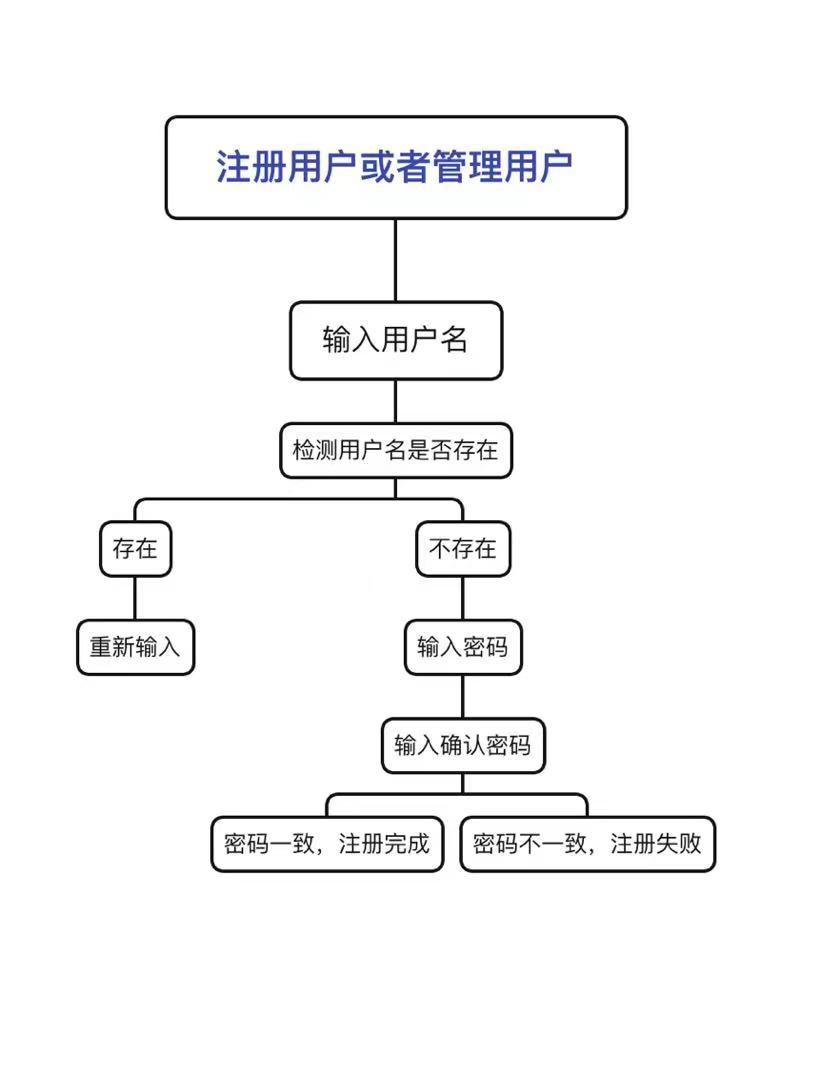
### **系统概要设计**   

#### 1. 系统概括
本系统为图书管理系统，主要实现了对管理员用户和普通用户的管理，包含了借还书籍等功能。

#### 2. 功能描绘
图书管理系统主要包括：管理用户信息、登录用户信息、查询图书、用户借还书籍、添加与删除书籍信息。              

#### 3. 重点技术和主要算法
先封装一些函数如用户权限、日期等，以便快速调用

注册管理员或普通用户信息功能的算法流程图如下：

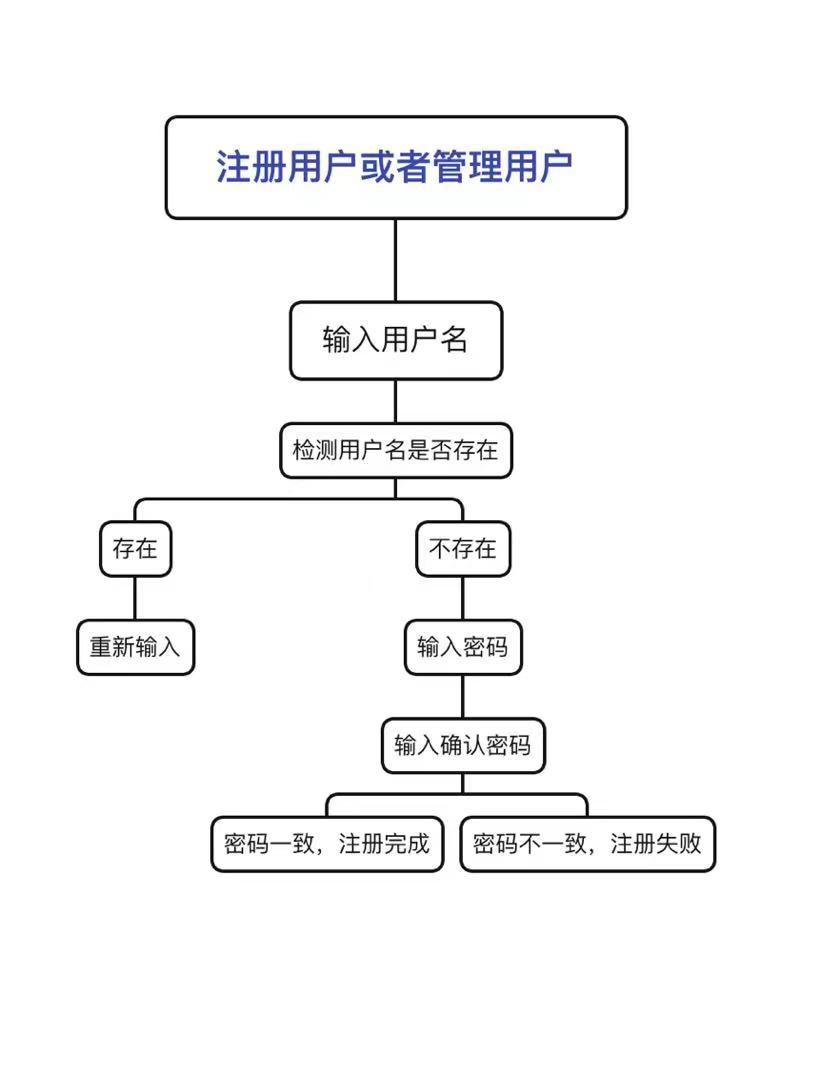


登录用户信息功能的算法流程图如下：

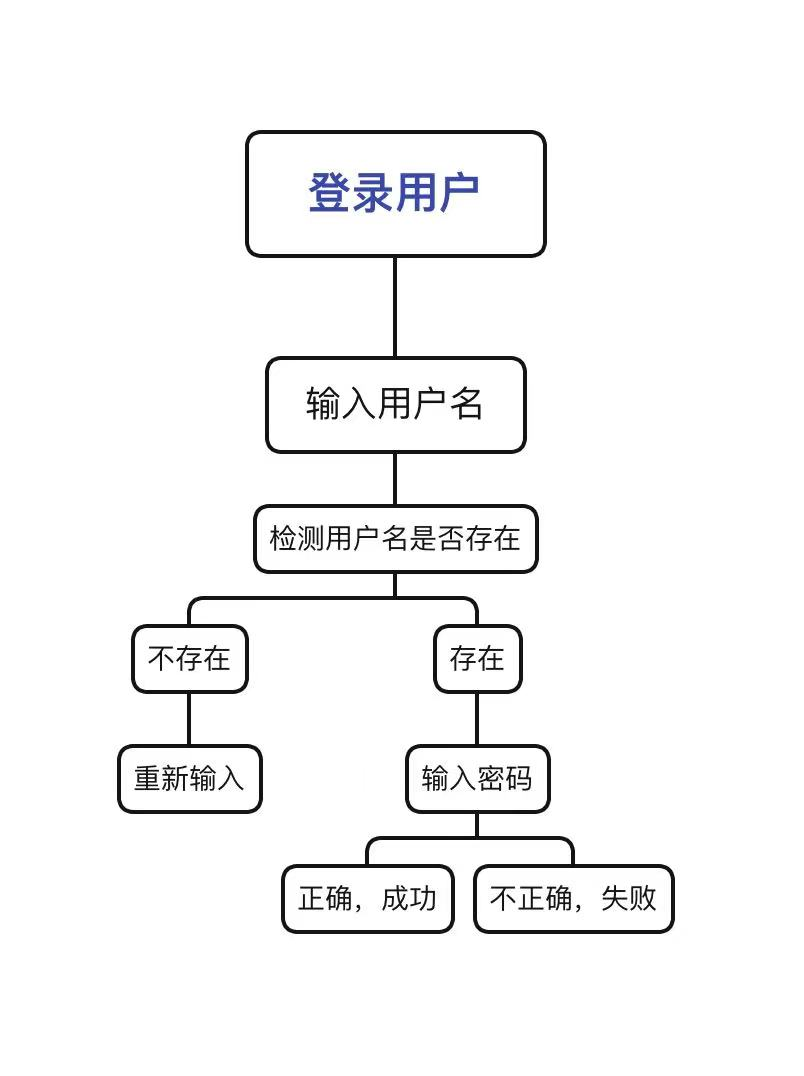


具体实现见如下代码

## 导入库

In [1]:
import os 
import sys
import pandas as pd
import re # 正则表达式
from datetime import datetime,timedelta
import uuid # 随机字符串
import time

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
#设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

## 工具代码

封装一些常用的函数来快速调用

In [2]:
# 格式输出
def print_message(*message):
    print("【{}】 【{}】".format(datetime.now(), message))
    
    
# 判断字符串是否是手机号码格式
def check_phone(n):
    if re.match(r'1[3,4,5,7,8]\d{9}',n):
        print("您输入的的手机号码是：\n",n)
        #中国联通：
        # 130，131，132，155，156，185，186，145，176
        if re.match(r'13[0,1,2]\d{8}',n) or \
            re.match(r"15[5,6]\d{8}",n) or \
            re.match(r"18[5,6]",n) or \
            re.match(r"145\d{8}",n) or \
            re.match(r"176\d{8}",n):
            print("该号码属于：中国联通")
        #中国移动
        # 134, 135 , 136, 137, 138, 139, 147, 150, 151,
        # 152, 157, 158, 159, 178, 182, 183, 184, 187, 188；
        elif re.match(r"13[4,5,6,7,8,9]\d{8}",n) or \
            re.match(r"147\d{8}|178\d{8}",n) or \
            re.match(r"15[0,1,2,7,8,9]\d{8}",n) or \
            re.match(r"18[2,3,4,7,8]\d{8}",n):
            print("该号码属于：中国移动")
        else:
            #中国电信
            #133,153,189
            print("该号码属于：中国电信")
        return True
    else:
        print("请输入正确的手机号")
        return False

def get_uuid():
    time_stamp = str(time.time())
    namespace = uuid.NAMESPACE_URL
    uuuid = uuid.uuid5(namespace,time_stamp)
    uuuid_string = str(uuuid).split("-")[-1]
    # print(time_stamp_uuid)
    return uuuid_string

def read_user_csv_names():
    # 读入user.csv文件
    users = pd.read_csv("db/user.csv", index_col= False)
    user_names = []
    if len(users) > 0:
        # 设定index
        users.columns = ["user_id" , "name"  , "password" ,  "phone"  , "status" ,  "role"]
        # 已注册用户名
        user_names = users['name'].values
    return user_names

# 获取user.csv的全部users
def read_user_csv_users():
    users = pd.read_csv("db/user.csv", index_col= False)
    return users

# 获取book.csv的全部books
def read_book_csv_books():
    books = pd.read_csv("db/book.csv", index_col= False)
    return books

# 获取history.csv的全部history
def read_history_csv_history():
    history = pd.read_csv("db/history.csv", index_col= False)
    return history

# 保存cache
def save_cache(cache_name, cache):
    with open("cache/{}".format(cache_name), "w") as f:
        f.write(cache)

# 获取用户权限
def get_role(role):
    role_dict = {1: "普通用户", 999: "管理员"}
    return role_dict[role]

# 获取今日日期
def get_today():
    # 获取今日日期
    now = datetime.now()
    # print(now)
    year = now.year
    month = now.month
    day = now.day
    today = f"{year}/{month}/{day}"
    # print(today)
    return today

## 注册管理员用户

注册管理员流程：

1.输入用户名

2.检测用户名是否存在

3.若存在用户名，重新输入

4.若不存在用户名，输入密码

5.输入确认密码

6.密码验证一致完成注册，否则注册失败。

In [10]:
# 注册管理员用户
while True:
    name = input("姓名（输入q结束流程）：")
    # 输入q结束
    if name == "q":
        print_message("结束")
        break
    # 判断用户是否存在?
    if name in read_user_csv_names():
        print_message("该用户已存在，请重新输入")
        continue
    password = input("密码：")
    confirm_password = input("确认密码：")
    if password != confirm_password:
        print_message("两次密码不一致，注册失败！请重新注册")
        continue
    phone = input("手机：")
    if not check_phone(phone):
        print_message("手机号输入错误，注册失败！请重新注册")
        continue
    try:
        users = read_user_csv_users()
        users=users.append({"user_id": get_uuid() , "name":name , "password":password, "phone":phone, "status":"1", "role":"999"} , ignore_index=True)
        users.to_csv("db/user.csv", index = False)
        print_message("注册成功")
        break
    except Exception as e:
        print_message("保存失败", e)

请输入正确的手机号
【2024-06-03 21:45:15.671419】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:45:16.667064】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:45:17.653254】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:45:18.657868】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:45:19.712886】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:45:20.737200】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:45:21.789512】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:45:22.840886】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:45:23.957316】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:45:25.031947】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:45:26.140374】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:45:27.256548】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:45:28.314635】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:45:29.468021】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:45:30.590961】 【('手机号输入错误，注册失败！请重新注册',)】
请输入正确的手机号
【2024-06-03 21:

## 注册普通用户

注册普通流程：

1.输入用户名

2.检测用户名是否存在

3.若存在用户名，重新输入

4.若不存在用户名，输入密码

5.输入确认密码

6.密码验证一致完成注册，否则注册失败。

**注：管理员用户与普通的用户注册的区别在于：普通用户的权限为1，管理员用户的权限为999**

In [ ]:
# 注册普通用户
while True:
    name = input("姓名（输入q结束流程）：")
    # 输入q结束
    if name == "q":
        print_message("结束")
        break
    # 判断用户是否存在?
    if name in read_user_csv_names():
        print_message("该用户已存在，请重新输入")
        continue
    password = input("密码：")
    confirm_password = input("确认密码：")
    if password != confirm_password:
        print_message("两次密码不一致，注册失败！请重新注册")
        continue
    phone = input("手机：")
    if not check_phone(phone):
        print_message("手机号输入错误，注册失败！请重新注册")
        continue
    try:
        users = read_user_csv_users()
        users=users.append({"user_id": get_uuid(), "name":name , "password":password, "phone":phone, "status":1, "role":1} , ignore_index=True)
        users.to_csv("db/user.csv", index = False)
        print_message("注册成功")
        break
    except Exception as e:
        print_message("保存失败", e)

## 登录用户

登录流程：

1.输入用户名

2.检测用户名是否存在

3.若存在用户名，输入密码

4.若不存在用户名，重新输入

6.用户名密码验证正确完成登录，否则登录失败。

7.用户登录完成后，将用户ID、用户role存入cache中，供后续调用。

In [ ]:
# 登录
while True:
    name = input("姓名（输入q结束流程）：")
    password = input("密码：")
    # 登录流程 name是否存在?密码是否正确？
    if name == "q":
        print_message("结束")
        break
    if name not in read_user_csv_names():
        print_message("该用户不存在，请重新输入！")
        continue
    # 获取当前name的密码
    users = read_user_csv_users()
    user_dict = users.loc[(users['name'] == name),:].to_dict()
    key = list(user_dict['user_id'].keys())[0]
    user_pw = user_dict['password'][key]
    if password == user_pw:
        # 保存登录cache到cache文件夹
        user_id = user_dict['user_id'][key]
        user_role = user_dict['role'][key]
        save_cache("login_cache.txt", "{} {}".format(user_id, user_role))
        role = get_role(user_role)
        print_message("登录成功！欢迎您：【{}】 来的图书城，用户等级：【{}】".format(name, role))
        break
    print_message("密码错误，登录失败！")

## 查询图书 -- 精确查询
精确查询流程：

1.输入待查询图书【准确】名称

2.若存在该图书，输出图书；若不存在，重新输入


In [ ]:
# 查询图书 -- 精确查询

def search_book():
    books = read_book_csv_books()

    while True:
        print_message("欢迎使用【精确】图书查询！")
        book_name = input("请输入要查询的书籍（输入q结束流程）：")
        # （输入q结束流程）
        if book_name == "q":
            print_message("结束")
            break
        book = books.loc[(books['book_name'] == book_name),:]
        if len(book)==0:
            print_message("未查询到该书 【{}】，请重新输入！".format(book_name))
            continue
        else:
            new_book = book
            new_book.columns = ["图书ID","图书名","作者","类型","ISBN","出版社","数量"] #直接在原数据上修改表头
            display(book)
            break
search_book()

## 查询图书 -- 模糊查询

模糊查询流程：

1.输入待查询图书【模糊】名称

2.若存在该图书，输出图书；若不存在，重新输入

模糊查询使用

book = books[[key in x for x in books['book_name']]]


In [ ]:
# 查询图书 -- 模糊查询

def search_book_dim():
    books = read_book_csv_books()

    while True:
        print_message("欢迎使用【模糊】图书查询！")
        key = input("请输入关键词（输入q结束流程）：")
        # （输入q结束流程）
        if key == "q":
            print_message("结束")
            break
        book = books[[key in x for x in books['book_name']]] # pandas模糊查询表达式
        if len(book)==0:
            print_message("未查询到该书 【{}】，请重新输入！".format(book_name))
            continue
        else:
            new_book = book
            new_book.columns = ["图书ID","图书名","作者","类型","ISBN","出版社","数量"] #直接在原数据上修改表头
            display(book)
            break

search_book_dim()

## 获取登录用户信息

从cache/login_cache.txt文件中读取相对应的数据

In [ ]:
# 获取登录用户信息
def get_login_user_info():
    with open("cache/login_cache.txt", "r") as f:
        user_info = f.read()
    if user_info != None:
        user_id = user_info.split(" ")[0]
        user_role = user_info.split(" ")[1]
        return user_id, user_role
    else:
        return None,None

get_login_user_info()

## 借书

借书流程：

1.获取登录用户的信息，确保用户为有效用户

2.输入要借图书ID

3.查询图书是否存在

4.若图书存在：确认借阅天数。

5.写入借阅历史数据库(db/history.csv)中

6.修改该图书数量（-1）

In [ ]:
# 借书

def rent_book():
    books = read_book_csv_books()
    user_id, user_role = get_login_user_info()
    if user_role in [1,999,"1","999"]:
        print_message("检测到您已登录！")
        while True:
            print_message("欢迎使用图书借阅系统！")
            book_id = input("请输入要借阅的书籍ID（输入q结束流程）：")
            # （输入q结束流程）
            if book_id == "q":
                print_message("结束")
                break
            book = books.loc[(books['book_id'] == int(book_id)),:]
            if len(book)==0:
                print_message("未查询到该书，请重新输入！")
                continue
            else:
                new_book = book
                new_book.columns = ["图书ID","图书名","作者","类型","ISBN","出版社","数量"] #直接在原数据上修改表头
                display(new_book)
                book_num = new_book['数量'].values[0]
                if book_num <= 0:
                    print_message("该书暂无存货！请重新输入借阅书籍ID或者按q退出")
                    continue
                flag = input("是否借阅该书籍？(请填y/n)")
                if flag == "y":
                    days = input("借阅天数：")
                    print()
                    books = read_book_csv_books()
                    num_index = list(books.columns).index('num')
                    book = books.loc[(books['book_id'] == int(book_id)),:]
                    book_num = book['num'].values[0]
                    books.iloc[int(book_id)-1,num_index] = book_num - 1              
                    book = books.loc[(books['book_id'] == int(book_id)),:]
                    books.to_csv("db/book.csv", index = False)
                    # 写入history.csv
                    start_day_string = get_today()
                    end_day = datetime.strptime(start_day_string, '%Y/%m/%d') + timedelta(days=int(days))
                    end_day_string = "{}/{}/{}".format(end_day.year,end_day.month,end_day.day)
                    history = read_history_csv_history()
                    history_dict = {"history_id": get_uuid(), "user_id": user_id, "book_id":book_id, "start_day":start_day_string, "end_day":end_day_string, "status":"1"}
                    history_df = pd.DataFrame(history_dict,index=[0])
                    new_history = history.append(history_df, sort=False)
                    new_history.to_csv("db/history.csv", index = False)
                    print_message("借书成功！")
                    print_message("借书开始时间", start_day_string)
                    print_message("借书结束时间", end_day_string, "请于结束前还书")
                    user_history = history.loc[(history['user_id'] == user_id),:]
                    user_history.columns = ["图书ID","结束日期","借阅ID","开始时间","状态","用户ID"] #直接在原数据上修改表头
                    print()
                    print("您的图书借阅情况：")
                    display(user_history)
                    break
                else:
                    print_message("借书结束！")
                    break
    else:
        print_message("检测到您未登录！请先登录！")
        
rent_book()

## 还书

还书流程：

1.获取登录用户的信息，确保用户为有效用户

2.查询该用户借阅历史

3.选择还书历史ID

4.确认是否归还

6.在借阅历史数据库(db/history.csv)中，删除该条借阅数据

6.修改该图书数量（+1）

In [ ]:
# 还书

def return_book():
    print_message("欢迎使用图书借阅系统！")
    history = read_history_csv_history()
    user_id, user_role = get_login_user_info()
    if user_role in [1,999,"1","999"]:
        print_message("检测到您已登录！你的借阅历史如下:")
        user_history = history.loc[(history['user_id'] == user_id),:]
        user_history_zh = user_history
        user_history_zh.columns = ["图书ID","结束日期","借阅ID","开始时间","状态","用户ID"] #直接在原数据上修改表头
        display(user_history_zh)
        books = read_book_csv_books()
        while True:
            history_id = input("请输入要还的借阅ID（输入q结束流程）：")
            # （输入q结束流程）
            if history_id == "q":
                print_message("结束")
                break
            book_history_zh = history.loc[(history['history_id'] == history_id),:]
            book_history_zh.columns = ["图书ID","结束日期","借阅ID","开始时间","状态","用户ID"]
            display(book_history_zh)
            flag = input("是否归还该书籍？(请填y/n)")
            if flag == "y":
                # 删除借阅历史
                new_history =  history.drop(history[history['history_id']==history_id].index)
                new_history.to_csv("db/history.csv", index = False)
                new_history_zh = new_history
                new_history_zh.columns = ["图书ID","结束日期","借阅ID","开始时间","状态","用户ID"]
                display(new_history_zh)
                # book.csv 加1
                book_id = book_history_zh["图书ID"].values[0]
                books = read_book_csv_books()
                num_index = list(books.columns).index('num')
                book = books.loc[(books['book_id'] == int(book_id)),:]
                book_num = book['num'].values[0]
                books.iloc[int(book_id)-1,num_index] = book_num + 1              
                book = books.loc[(books['book_id'] == int(book_id)),:]
                books.to_csv("db/book.csv", index = False)
                print_message("还书成功！")
                break
    else:
        print_message("检测到您未登录！请先登录！")

return_book()

## 添加书籍

添加书籍流程：

1.输入管理员账号和密码，验证管理员账号密码正确

2.添加图书相关信息

3.在图书数据库(db/book.csv)中，新增该条图书数据

In [ ]:
# 添加书籍

def add_book():
    print_message("欢迎使用图书添加系统！")
    login_flag = True
    while login_flag:
        # 管理员登录，只有管理员能添加书籍
        name = input("管理员（输入q结束流程）：")
        password = input("管理员密码：")
        if name == "q":
                print_message("结束")
                break
            # 登录流程 name是否存在?密码是否正确？
        if name not in read_user_csv_names():
            print_message("该管理员不存在，请重新输入！")
            continue
        # 获取当前name的密码
        users = read_user_csv_users()
        user_dict = users.loc[(users['name'] == name),:].to_dict()
        key = list(user_dict['user_id'].keys())[0]
        user_pw = user_dict['password'][key]
        if password == user_pw:
            print_message("登录成功！欢迎您：【{}】 来的图书城，用户等级：【管理员】".format(name))
            login_flag = False
            # 添加书籍
        else:
            print_message("密码错误，登录失败！")
            break
    # 开始添加图书
    while True:
        print_message("开始添加书籍！")
        # 添加图书名
        book_name_flag = True
        while book_name_flag:
            book_name = input("请输入要添加的图书名：")
            if book_name == "":
                print_message("图书名输入不能为空，请重新输入！")
                continue
            else:
                book_name_flag = False
        # 添加图书作者
        book_author_flag = True
        while book_author_flag:
            book_author = input("请输入该图书作者：")
            if book_author == "":
                print_message("图书作者输入不能为空，请重新输入！")
                continue
            else:
                book_author_flag = False
        # 添加图书类型
        book_type_flag = True
        while book_type_flag:
            book_type = input("请输入该图书类型：")
            if book_type == "":
                print_message("图书类型输入不能为空，请重新输入！")
                continue
            else:
                book_type_flag = False
        # 添加图书ISBN
        book_ISBN_flag = True
        while book_ISBN_flag:
            book_ISBN = input("请输入该图书ISBN：")
            if book_ISBN == "":
                print_message("图书ISBN输入不能为空，请重新输入！")
                continue
            else:
                book_ISBN_flag = False
        # 添加图书出版社
        book_press_flag = True
        while book_press_flag:
            book_press = input("请输入该图书出版社：")
            if book_press == "":
                print_message("图书出版社输入不能为空，请重新输入！")
                continue
            else:
                book_press_flag = False
        # 添加图书数量
        book_num_flag = True
        while book_num_flag:
            book_num = input("请输入该图书数量：")
            if book_num == "" or book_num == 0:
                print_message("图书数量输入不能为空/0，请重新输入！")
                continue
            else:
                book_num_flag = False        
                
        books = read_book_csv_books()
        book_id = books["book_id"].values.tolist()[-1]
        book_dict = {"book_id":str(int(book_id)+1),"book_name":book_name,"author":book_author,"type":book_type,"ISBN":book_ISBN,"press":book_press,"num":book_num}
        book_df = pd.DataFrame(book_dict,index=[0])
        new_books = books.append(book_df, sort=False)
        new_books.to_csv("db/book.csv", index = False)
        print_message("图书添加成功！")
        book_df_zh = book_df
        book_df_zh.columns = ["图书ID","图书名","作者","类型","ISBN","出版社","数量"]
        display(book_df_zh)
        break
add_book()

## 删除书籍

删除书籍流程：

1.输入管理员账号和密码，验证管理员账号密码正确

2.显示所有图书信息

3.选择待删除图书

4.在图书数据库(db/book.csv)中，删除该条图书数据

In [ ]:
# 删除图书

def delete_book():
    print_message("欢迎使用图书添加系统！")
    # 管理员登录
    login_flag = True
    admin_flag = False
    while login_flag:
        # 管理员登录，只有管理员能添加书籍
        name = input("管理员（输入q结束流程）：")
        password = input("管理员密码：")
        if name == "q":
                print_message("结束")
                break
            # 登录流程 name是否存在?密码是否正确？
        if name not in read_user_csv_names():
            print_message("该管理员不存在，请重新输入！")
            continue
        # 获取当前name的密码
        users = read_user_csv_users()
        user_dict = users.loc[(users['name'] == name),:].to_dict()
        key = list(user_dict['user_id'].keys())[0]
        user_pw = user_dict['password'][key]
        login_flag = False
        
        if password == user_pw and user_dict['role'][key] in [999,"999"]:
            print_message("登录成功！欢迎您：【{}】 来的图书城，用户等级：【管理员】".format(name))
            # 添加书籍
            admin_flag = True
        else:
            print_message("密码错误/您不是管理员，登录失败！")
            break

    if admin_flag:
        books = read_book_csv_books()
        # 获取当前全部图书ID
        book_ids = books["book_id"].values.tolist()
        books_zh = books
        books_zh.columns = ["图书ID","图书名","作者","类型","ISBN","出版社","数量"]
        print_message("查看全部图书信息")
        display(books)
        # 选择删除图书ID
        book_id_flag = True
        while book_id_flag:
            book_id = input("请选择需要删除的图书ID:")
            if book_id == "" or int(book_id) not in book_ids:
                print_message("图书数量输入不能为空/0，请重新输入！")
                continue
            else:
                book_id_flag = False
                new_books = read_book_csv_books()
                save_books = new_books.drop(new_books[new_books['book_id']==int(book_id)].index)
                save_books.to_csv("db/book.csv", index = False)
                print_message("删除成功！")
                new_books = read_book_csv_books()
                display(new_books)
delete_book()

## 二、案例练习
根据上述案例学习内容，给该图书管理系统中给书籍添加价值，普通用户增加书本逾期未归还收取逾期手续费的机制，逾期手续费为书籍价值 X 1% 每星期。

# 代码来自Groundbreaker 
# 想联系我的话花点心思不难找到我的联系方式
# 如果今年题目变了代码用不了了，可以在Github上找到我，我会尽快更新代码

In [5]:
#添加价值

def add_book_value():
    print_message("欢迎使用图书添加系统！")
    # 管理员登录
    login_flag = True
    admin_flag = False
    while login_flag:
        # 管理员登录，只有管理员能添加书籍价值
        name = input("管理员（输入q结束流程）：")
        password = input("管理员密码：")
        if name == "q":
                print_message("结束")
                break
            # 登录流程 name是否存在?密码是否正确？
        if name not in read_user_csv_names():
            print_message("该管理员不存在，请重新输入！")
            continue
        # 获取当前name的密码
        users = read_user_csv_users()
        user_dict = users.loc[(users['name'] == name),:].to_dict()
        key = list(user_dict['user_id'].keys())[0]
        user_pw = user_dict['password'][key]
        login_flag = False
        
        if password == user_pw and user_dict['role'][key] in [999,"999"]:
            print_message("登录成功！欢迎您：【{}】 来的图书城，用户等级：【管理员】".format(name))
            # 添加书籍
            admin_flag = True
        else:
            print_message("密码错误/您不是管理员，登录失败！")
            break
    
    if admin_flag:
        books = read_book_csv_books()
        book_names = books["book_name"].values.tolist()
        for book_name in book_names:
            value = input(f"请输入{book_name}的价值:")
            books['book_value'] = value
        books.to_csv("db/book.csv", index=False)

add_book_value()

【2024-06-03 21:47:22.258640】 【('欢迎使用图书添加系统！',)】
【2024-06-03 21:47:24.805953】 【('登录成功！欢迎您：【admin】 来的图书城，用户等级：【管理员】',)】


In [13]:
def cal_fee():
    if_login = False
    # 登录
    while True:
        name = input("姓名（输入q结束流程）：")
        password = input("密码：")
        # 登录流程 name是否存在?密码是否正确？
        if name == "q":
            print_message("结束")
            break
        if name not in read_user_csv_names():
            print_message("该用户不存在，请重新输入！")
            continue
        # 获取当前name的密码
        users = read_user_csv_users()
        user_dict = users.loc[(users['name'] == name),:].to_dict()
        key = list(user_dict['user_id'].keys())[0]
        user_pw = user_dict['password'][key]
        if password == user_pw:
            # 保存登录cache到cache文件夹
            user_id = user_dict['user_id'][key]
            user_role = user_dict['role'][key]
            save_cache("login_cache.txt", "{} {}".format(user_id, user_role))
            role = get_role(user_role)
            print_message("登录成功！欢迎您：【{}】 来的图书城，用户等级：【{}】".format(name, role))
            if_login = True
        else:
            print_message("密码错误，登录失败！")
    
        if if_login:
            history = read_history_csv_history()
            users = read_user_csv_users()
            books = read_book_csv_books()
            
            user_id = users.loc[users['name'] == name, 'user_id'].values[0]
            if user_id in history['user_id'].tolist():
            # 根据 user_id 查找该用户的所有租借信息
                user_history = history[history['user_id'] == user_id]
                
                start_days = user_history['start_day'].values
                end_days = user_history['end_day'].values
                book_ids = user_history['book_id'].values

                # 查找对应的书籍价值
                book_values = []
                for book_id in book_ids:
                    book_value = books.loc[books['book_id'] == book_id, 'book_value'].values[0]
                    book_values.append(book_value)

                # 计算逾期手续费
                total_late_fee = 0

                for start_day, end_day, book_value in zip(start_days, end_days, book_values):
                    start_date = datetime.strptime(start_day, '%Y/%m/%d').date()
                    end_date = datetime.strptime(end_day, '%Y/%m/%d').date()
                    weeks_overdue = (end_date - start_date).days // 7
                    late_fee = weeks_overdue * 0.01 * book_value
                    total_late_fee += late_fee

                print_message(f"用户{name}需要缴纳的手续费为{total_late_fee:.2f}元")

            else:
                print_message(f"用户{name}没有借阅记录")

cal_fee()

【2024-06-03 23:20:19.765928】 【('登录成功！欢迎您：【user1】 来的图书城，用户等级：【普通用户】',)】
【2024-06-03 23:20:19.781502】 【('用户user1需要缴纳的手续费为0.10元',)】
【2024-06-03 23:20:22.825319】 【('结束',)】
